# 主成分分析

高维情形下出现的数据样本稀疏，距离计算困难，是机器学习算法共同面临的严重障碍。被称为 **维数灾难(Curse of dimensionality)**。

缓解维数灾难的一个重要途径是降维(Dimensionality Reduction) ，降维是指通过某种数学变换（映射）方法，将高维空间中的数据映射到低维空间中。

主成分分析 (Principal Component Analysis PCA) 是常用的一种降维方法。


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import utils
utils.use_svg()

## 制造数据

首先我们制造一些数据，通过正态分布生成白数据。

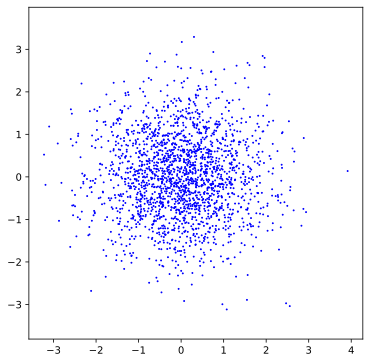

In [2]:
N = 2000 # 数据量
X = np.random.normal(0, 1, N)
Y = np.random.normal(0, 1, N)
D = np.stack([X, Y]) # 原始数据

ax = plt.figure(figsize=(6, 6)).add_subplot()
ax.scatter(D[0], D[1], s = 1, c='blue')
ax.set(xlim=(-4, 4), ylim=(-4, 4))
ax.axis('equal')
plt.show()

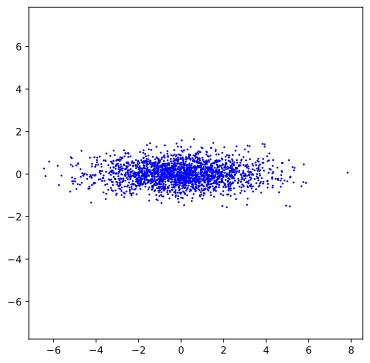

In [3]:
# 然后对齐进行拉伸

S = np.array([
    [2, 0],
    [0, 0.5],
])

D1 = np.matmul(S, D)
ax = plt.figure(figsize=(6, 6)).add_subplot()
ax.scatter(D1[0], D1[1], s = 1, c='blue')
ax.axis('equal')
plt.show()

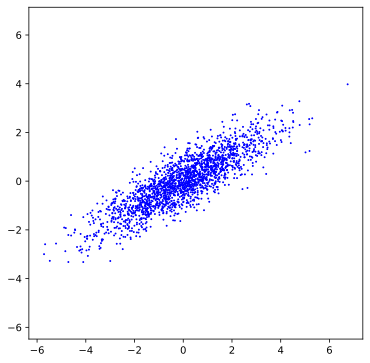

In [4]:
# 旋转
theta = 1 / 6.0 * np.pi
R = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta), np.cos(theta)],
])

D2 = np.matmul(R, D1)
ax = plt.figure(figsize=(6, 6)).add_subplot()
ax.scatter(D2[0], D2[1], s = 1, c='blue')
ax.axis('equal')
plt.show()

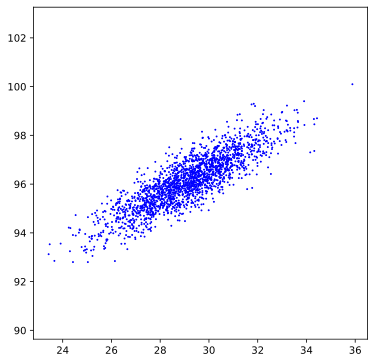

[[29.13722621]
 [96.12068853]]


In [5]:
# 最后在加点偏移

offset = np.random.rand(2, 1) * 100
D3 = D2 + offset
ax = plt.figure(figsize=(6, 6)).add_subplot()
ax.scatter(D3[0], D3[1], s = 1, c='blue')
ax.axis('equal')
plt.show()
print(offset)

通过以上的操作，我们为白数据添加了一些相关性，得到了新的数据，假设是我们通过采集或者数据处理得到的的原始数据。

## 主成分分析

上面的数据是二维的，降维就是我们要将数据通过一种变换，映射到一维空间中，也就是一条线上，主成分分析的要求是需要变换后的信息量最多，数据点尽可能分开，也就是方差要大。

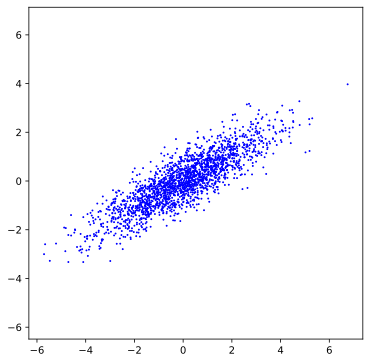

[[29.1328474 ]
 [96.12702546]]


In [6]:
# 中心化，对不同维度减去均值

mean = np.mean(D3, axis=1).reshape((2, 1))
D4 = D3 - mean
ax = plt.figure(figsize=(6, 6)).add_subplot()
ax.scatter(D4[0], D4[1], s = 1, c='blue')
ax.axis('equal')
plt.show()
print(mean)

In [7]:
# 求协方差矩阵
DDT = np.matmul(D4, D4.T)
DDT

array([[6145.08760199, 3270.71723264],
       [3270.71723264, 2368.39472006]])

In [8]:
# 求特征值和特征向量

values, vectors = np.linalg.eig(DDT)
print(values)
print(vectors)

[8033.43859357  480.04372847]
[[ 0.86602523 -0.5000003 ]
 [ 0.5000003   0.86602523]]


In [9]:
# 取最大的一些特征值，这里只能去最大的一个（总共两维，降成一维）

idx = np.argmax(values)
value = values[idx]
vector = vectors[..., idx]
print(value, vector)

8033.438593570674 [0.86602523 0.5000003 ]


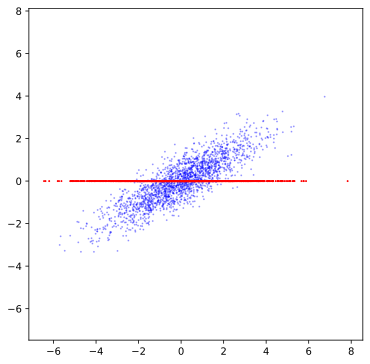

In [11]:
D5 = np.matmul(vector, D4)

ax = plt.figure(figsize=(6, 6)).add_subplot()
ax.scatter(D4[0], D4[1], s = 1, c='blue', alpha=0.3)
ax.scatter(D5, np.zeros_like(D5), s = 1, c='red')
ax.axis('equal')
plt.show()

最后的红色是我们经过降维后的数据。

## References

- [1] 周志华. 机器学习[M/OL]. <a href="https://book.douban.com/press/2562">清华大学出版社</a><span class="pl">出版年:</span> 2016-1-1, 2016. https://book.douban.com/subject/26708119/.
